In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read Dataset
dataset = pd.read_csv('Mall-Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, [3, 4]].values

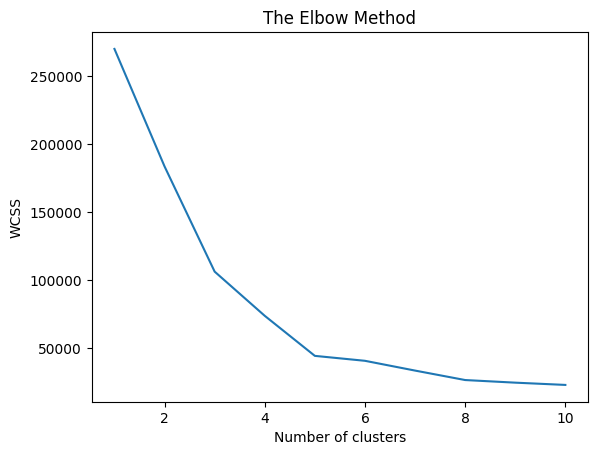

In [5]:
# Perform Elbow Method
from sklearn.cluster import KMeans
list1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
plt.plot(range(1, 11), list1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Model Creation
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=8,
    assign_labels='discretize',
    random_state=0,
    affinity='rbf',
    gamma=0.1)
cluster=clustering.fit_predict(X)

In [13]:
# Adding column to the dataset
supervised=dataset
supervised['Cluster_group']=cluster

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,7
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,7
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [15]:
# To save the added column in csv file
supervised.to_csv("cluster.csv",index=False)

In [16]:
# view the column names
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

/opt/anaconda3/envs/AIML/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


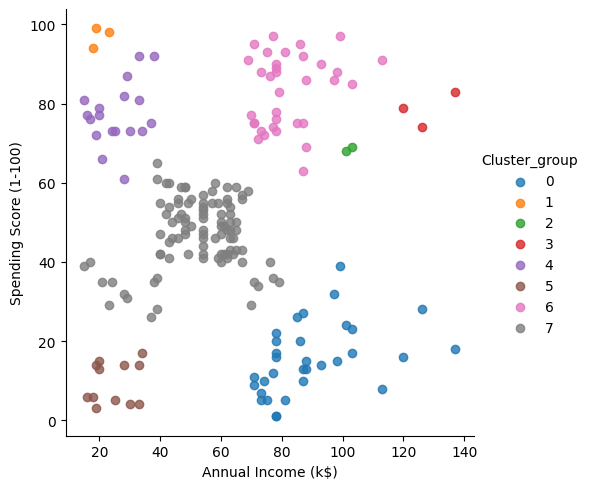

In [17]:
# Graph
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True,legend_out=True)